In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

with open("df_master.pkl", 'rb') as picklefile: 
    df_master = pickle.load(picklefile)
df_master.head()

,actors,directors,dom_gross,genre,mpaa_rating,opening_release,opening_we_gross,producers,release_date,runtime,...,actor_cum_dom_roi,director_cum_oscar_noms,director_cum_oscars,director_cum_dom_roi,producer_cum_oscar_noms,producer_cum_oscars,producer_cum_dom_roi,writer_cum_oscar_noms,writer_cum_oscars,writer_cum_dom_roi
0,"[Liam Neeson, Bradley Cooper, Sharlto Copley, ...",[Joe Carnahan],77222099.0,Action,PG-13,3535.0,25669455.0,"[Ridley Scott, Tony Scott, Alex Young]",2010-06-11,117.0,...,0.934102,0.0,0.0,-0.081967,4.0,1.0,-0.045837,0.0,0.0,0.025368
1,NaN,NaN,4264983.0,Drama,Unrated,302.0,2190042.0,NaN,2016-10-28,158.0,...,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN
2,NaN,NaN,930211.0,Musical,PG-13,4.0,83743.0,NaN,1986-04-18,108.0,...,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN
3,"[Paul Newman, Sally Field]",[Sydney Pollack],40716963.0,Drama / Thriller,PG,2.0,97667.0,[Sydney Pollack],1981-11-20,116.0,...,NaN,3.0,0.0,NaN,4.0,0.0,NaN,0.0,0.0,NaN
4,NaN,NaN,1031.0,Thriller,Unrated,NaN,NaN,NaN,2013-07-05,82.0,...,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN


In [3]:
df_master.columns

Index(['actors', 'directors', 'dom_gross', 'genre', 'mpaa_rating',
       'opening_release', 'opening_we_gross', 'producers', 'release_date',
       'runtime', 'studio', 'theatrical_run', 'title', 'widest_release',
       'writers', 'ww_gross', 'oscar_noms', 'oscars', 'release_decade',
       'imdb_rating', 'imdb_num_votes', 'final_budget', 'dom_roi',
       'actor_cum_oscar_noms', 'actor_cum_oscars', 'actor_cum_dom_roi',
       'director_cum_oscar_noms', 'director_cum_oscars',
       'director_cum_dom_roi', 'producer_cum_oscar_noms',
       'producer_cum_oscars', 'producer_cum_dom_roi', 'writer_cum_oscar_noms',
       'writer_cum_oscars', 'writer_cum_dom_roi'],
      dtype='object')

In [156]:
df_reduced = df_master[['dom_gross', 'opening_release', 'opening_we_gross', 'imdb_rating', 'final_budget', \
                        'actor_cum_oscar_noms', 'actor_cum_oscars', 'actor_cum_dom_roi', 'director_cum_oscar_noms', \
                        'director_cum_oscars', 'director_cum_dom_roi', 'producer_cum_oscar_noms', \
                        'producer_cum_oscars', 'producer_cum_dom_roi', 'writer_cum_oscar_noms', \
                        'writer_cum_oscars', 'writer_cum_dom_roi']]

In [167]:
min(df_master['release_date'])

Timestamp('1919-01-01 00:00:00')

In [157]:
df_reduced.shape

(18522, 17)

In [158]:
df_reduced = df_reduced.dropna()

In [159]:
df_reduced.shape

(1403, 17)

In [160]:
df_reduced.count()

dom_gross                  1403
opening_release            1403
opening_we_gross           1403
imdb_rating                1403
final_budget               1403
actor_cum_oscar_noms       1403
actor_cum_oscars           1403
actor_cum_dom_roi          1403
director_cum_oscar_noms    1403
director_cum_oscars        1403
director_cum_dom_roi       1403
producer_cum_oscar_noms    1403
producer_cum_oscars        1403
producer_cum_dom_roi       1403
writer_cum_oscar_noms      1403
writer_cum_oscars          1403
writer_cum_dom_roi         1403
dtype: int64

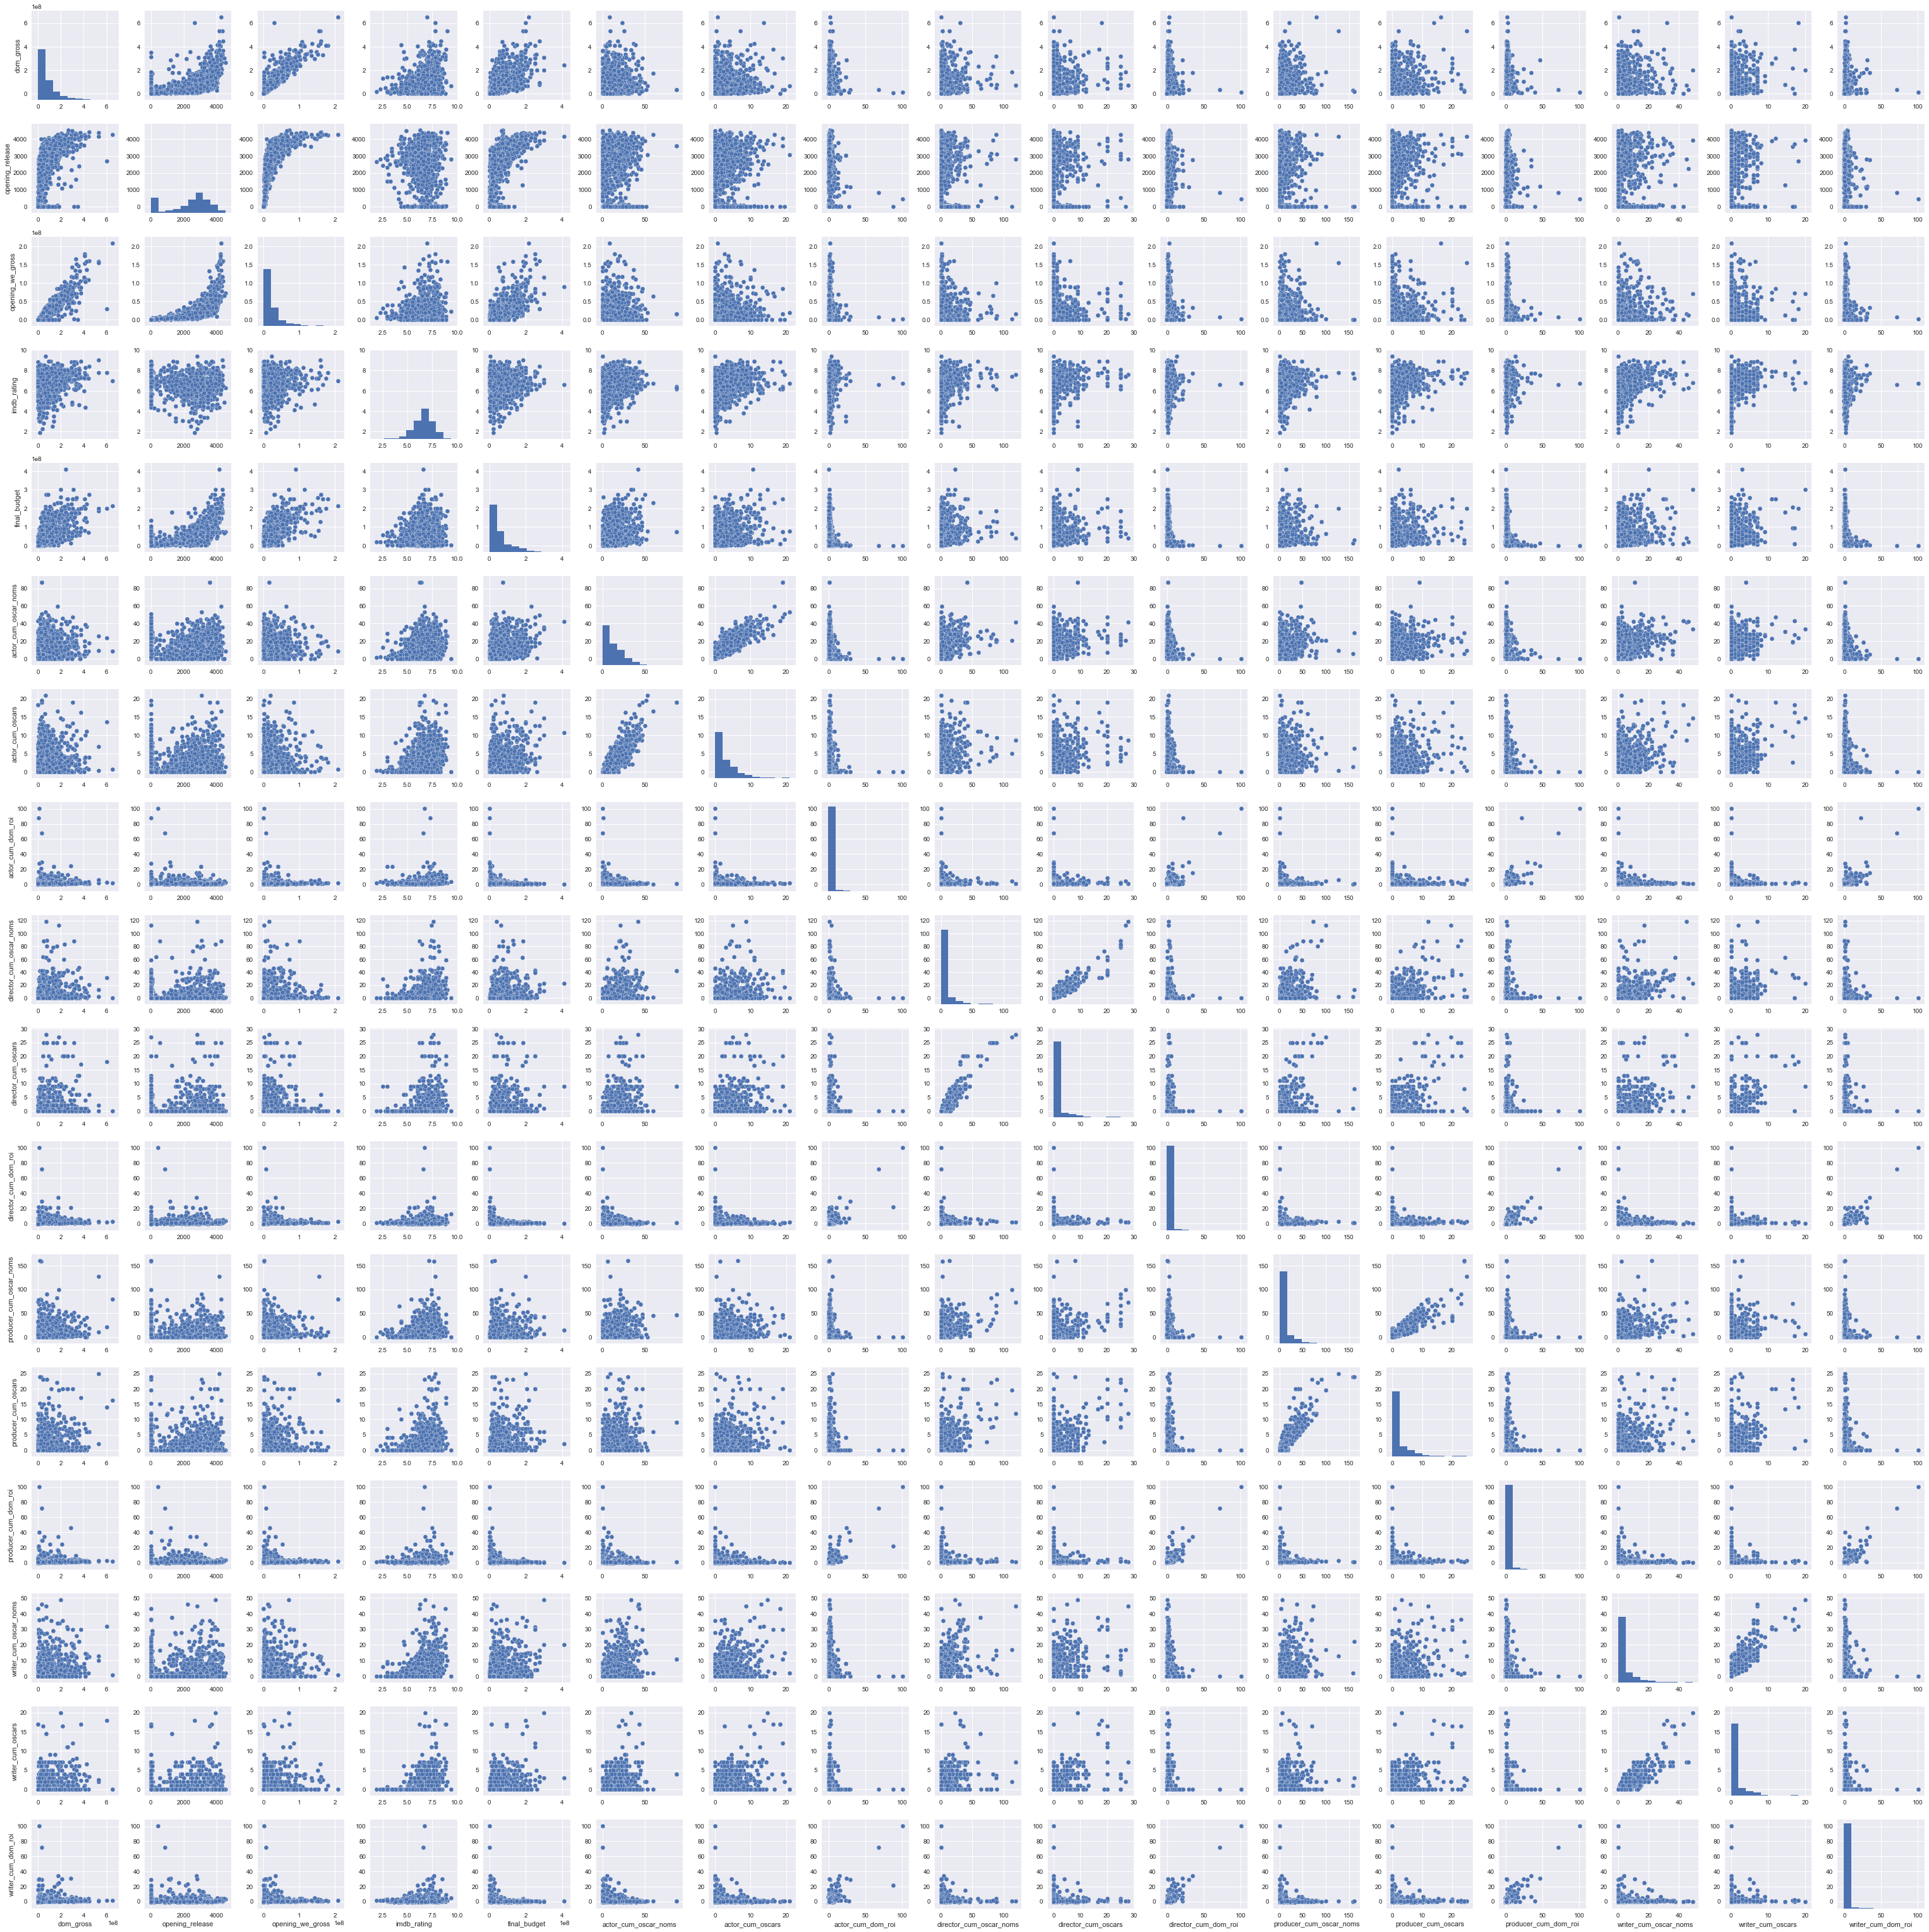

In [161]:
sns.pairplot(df_reduced);

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split

/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [162]:
X = df_reduced[['opening_release', 'opening_we_gross', 'imdb_rating', 'final_budget', \
                'actor_cum_oscar_noms', 'actor_cum_oscars', 'actor_cum_dom_roi', 'director_cum_oscar_noms', \
                'director_cum_oscars', 'director_cum_dom_roi', 'producer_cum_oscar_noms', \
                'producer_cum_oscars', 'producer_cum_dom_roi', 'writer_cum_oscar_noms', \
                'writer_cum_oscars', 'writer_cum_dom_roi']]
y = df_reduced['dom_gross']

In [168]:
lr = LinearRegression()
scores = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    lr.fit(X_train, y_train)
    scores.append(lr.score(X_test, y_test))
    predictions = lr.predict(X_test)
    resid = y_test - predictions
scores

[0.757126033914852,
 0.84498985928798809,
 0.85577734792707227,
 0.74678928860350346,
 0.82715392320404468,
 0.85945936692298264,
 0.83165694883446628,
 0.84870966770361989,
 0.86258927858558854,
 0.76598021387936177]

In [169]:
coef_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefs'])
coef_df

,Coefs
opening_release,-1.979065e+03
opening_we_gross,2.700824e+00
imdb_rating,1.005102e+07
final_budget,1.153756e-01
actor_cum_oscar_noms,-3.687204e+05
actor_cum_oscars,7.180268e+05
actor_cum_dom_roi,1.741522e+05
director_cum_oscar_noms,6.949639e+04
director_cum_oscars,1.195183e+06
director_cum_dom_roi,1.285706e+06


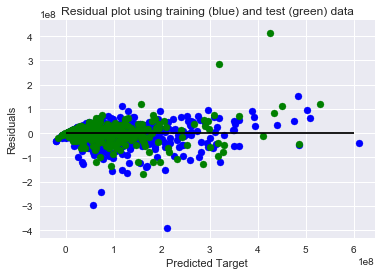

In [175]:
plt.scatter(lr.predict(X_train), lr.predict(X_train) - y_train, c='b')
plt.scatter(lr.predict(X_test), lr.predict(X_test) - y_test, c='g')
plt.hlines(y=0, xmin=0, xmax=600000000)
plt.title('Residual plot using training (blue) and test (green) data')
plt.ylabel('Residuals')
plt.xlabel('Predicted Target');

With this in mind let's try to find a baseline

## Domestic Gross from Budget: A Baseline

In [181]:
df_baseline = df_master[['dom_gross', 'final_budget']]

In [182]:
df_baseline = df_baseline.dropna()
df_baseline.shape

(4477, 2)

In [212]:
X = df_baseline[['final_budget']]
y = df_baseline[['dom_gross']]

lr = LinearRegression()
scores = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    lr.fit(X_train, y_train)
    scores.append(lr.score(X_test, y_test))
np.mean(scores)

0.42620497668753876

In [184]:
coef_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefs'])
coef_df

,Coefs
final_budget,1.019753


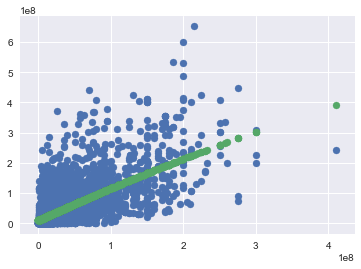

In [527]:
plt.scatter(X.final_budget, y.dom_gross)
plt.scatter(X.final_budget, lr.predict(X));

## This looks like it could be better fit with X^2

In [226]:
X['budget_sq'] = np.square(X.final_budget)

In [233]:
lr2 = LinearRegression()
scores = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    lr2.fit(X_train, y_train)
    scores.append(lr2.score(X_test, y_test))
np.mean(scores)

0.4397589748980959

In [241]:
list(X.columns)

['final_budget', 'budget_sq']

In [248]:
coef_df1 = pd.DataFrame(lr2.coef_[0], index=X.columns, columns=['Coefs'])
coef_df1

,Coefs
final_budget,1.132458e+00
budget_sq,-5.636265e-10


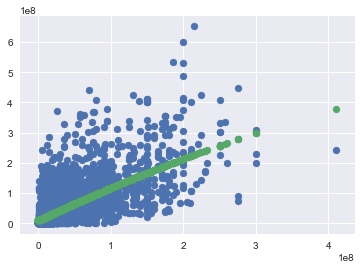

In [249]:
plt.scatter(X.final_budget, y.dom_gross)
plt.scatter(X.final_budget, lr2.predict(X));

Not really much gain here let's move on to adding some features

## Adding Numerical Variables

In [252]:
df_numericals = df_master[['dom_gross', 'imdb_rating', 'final_budget', 'actor_cum_oscar_noms', 'actor_cum_oscars', 'actor_cum_dom_roi', 'director_cum_oscar_noms', \
                           'director_cum_oscars', 'director_cum_dom_roi', 'producer_cum_oscar_noms', \
                           'producer_cum_oscars', 'producer_cum_dom_roi', 'writer_cum_oscar_noms', \
                           'writer_cum_oscars', 'writer_cum_dom_roi']]

In [255]:
df_numericals = df_numericals.dropna()
df_numericals.shape

(1408, 15)

In [257]:
X_numericals = df_numericals.iloc[:,1:]

In [260]:
y_numericals = df_numericals.iloc[:,0]

In [537]:
lr3 = LinearRegression()
scores3 = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_numericals, y_numericals, test_size=0.3)
    lr3.fit(X_train, y_train)
    scores3.append((lr3.score(X_test, y_test), (lr3.score(X_train, y_train))))
scores3

[(0.44394618209294212, 0.51375421092981577),
 (0.47089064100125366, 0.50389952733338328),
 (0.23894271368099784, 0.52463320363898491),
 (0.42720049054682852, 0.52058683228983615),
 (0.4501240314008762, 0.51714670921183536),
 (0.4434537348255897, 0.5170962106275363),
 (0.42912089209494453, 0.51282731332128151),
 (0.52415724453094947, 0.48852355517220603),
 (0.41044743746856827, 0.51151504037244888),
 (0.47048212151107865, 0.50925081446533693)]

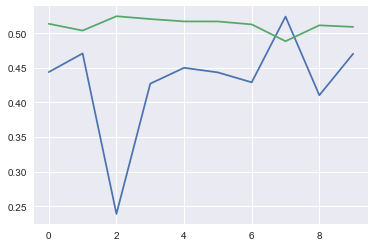

In [538]:
plt.plot(scores3)

In [282]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV

In [540]:
lr4 = LinearRegression()
scores4 = []
X2 = PolynomialFeatures().fit_transform(X_numericals)
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X2, y_numericals, test_size=0.3)
    lr4.fit(X_train, y_train)
    scores4.append((lr4.score(X_test, y_test), (lr4.score(X_train, y_train))))
scores4

[(0.34130288117718421, 0.82824982963245819),
 (0.69424325298469047, 0.82584544283232031),
 (0.54120387949882098, 0.83019341724995099),
 (0.591142114270789, 0.84111379182619661),
 (0.49177223939001302, 0.84727773615738999),
 (0.71827093120764895, 0.83235694789787795),
 (0.59290734206957119, 0.81567057128963905),
 (0.036785057756259953, 0.82985561432333188),
 (0.48131286051317002, 0.8279631326716107),
 (0.59158840316061156, 0.58875815219117511)]

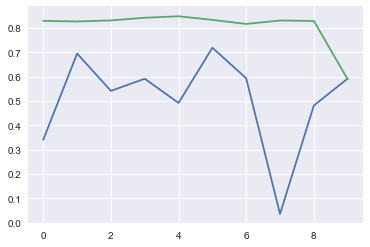

In [541]:
plt.plot(scores4);

In [274]:
coef_df2 = pd.DataFrame(lr3.coef_, index=X_numericals.columns, columns=['Coefs'])
coef_df2

,Coefs
imdb_rating,1.970784e+07
final_budget,1.071087e+00
actor_cum_oscar_noms,-1.925091e+06
actor_cum_oscars,6.268367e+05
actor_cum_dom_roi,-8.080586e+05
director_cum_oscar_noms,5.756341e+05
director_cum_oscars,-8.832132e+05
director_cum_dom_roi,2.470360e+06
producer_cum_oscar_noms,-4.973531e+04
producer_cum_oscars,4.521326e+05


In [309]:
lr4 = LassoCV(normalize=True)
scores = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X2, y_numericals, test_size=0.3)
    lr4.fit(X_train, y_train)
    scores.append((lr4.score(X_test, y_test), (lr4.score(X_train, y_train))))
scores

/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: 

[(0.79149971922133078, 0.79045309069763781),
 (0.7998525022218268, 0.7987963631710725),
 (0.77297172166266193, 0.80614712906224284),
 (0.7439064724034592, 0.75536879572473914),
 (0.78679418943900781, 0.80063401416016788),
 (0.79694009813757838, 0.77124824777033352),
 (0.78171737986961587, 0.78400209248851926),
 (0.78122315336288661, 0.79283699662948115),
 (0.7676794052662157, 0.79033665054481483),
 (0.80995362190386577, 0.75697528447147666)]

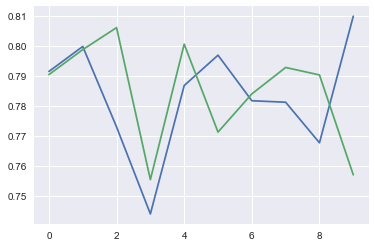

In [310]:
plt.plot(scores);

In [331]:
PolynomialFeatures().fit(X_numericals).get_feature_names(X_numericals.columns)

['1',
 'imdb_rating',
 'final_budget',
 'actor_cum_oscar_noms',
 'actor_cum_oscars',
 'actor_cum_dom_roi',
 'director_cum_oscar_noms',
 'director_cum_oscars',
 'director_cum_dom_roi',
 'producer_cum_oscar_noms',
 'producer_cum_oscars',
 'producer_cum_dom_roi',
 'writer_cum_oscar_noms',
 'writer_cum_oscars',
 'writer_cum_dom_roi',
 'imdb_rating^2',
 'imdb_rating final_budget',
 'imdb_rating actor_cum_oscar_noms',
 'imdb_rating actor_cum_oscars',
 'imdb_rating actor_cum_dom_roi',
 'imdb_rating director_cum_oscar_noms',
 'imdb_rating director_cum_oscars',
 'imdb_rating director_cum_dom_roi',
 'imdb_rating producer_cum_oscar_noms',
 'imdb_rating producer_cum_oscars',
 'imdb_rating producer_cum_dom_roi',
 'imdb_rating writer_cum_oscar_noms',
 'imdb_rating writer_cum_oscars',
 'imdb_rating writer_cum_dom_roi',
 'final_budget^2',
 'final_budget actor_cum_oscar_noms',
 'final_budget actor_cum_oscars',
 'final_budget actor_cum_dom_roi',
 'final_budget director_cum_oscar_noms',
 'final_budget di

In [332]:
coef_df3 = pd.DataFrame(lr4.coef_, index=PolynomialFeatures().fit(X_numericals).get_feature_names(X_numericals.columns), columns=['Coefs'])
coef_df3[coef_df3['Coefs'] != 0].sort_values('Coefs', ascending=False)

,Coefs
imdb_rating^2,453676.910739
actor_cum_dom_roi writer_cum_oscar_noms,112252.765976
final_budget actor_cum_dom_roi,0.312725
final_budget writer_cum_dom_roi,0.232789
final_budget director_cum_dom_roi,0.155654
final_budget producer_cum_dom_roi,0.136919
imdb_rating final_budget,0.072230
director_cum_oscars producer_cum_oscar_noms,-2866.171454
writer_cum_oscar_noms writer_cum_dom_roi,-149697.826870
actor_cum_oscar_noms actor_cum_dom_roi,-198922.276794


## Predicting Oscar Noms

In [496]:
df_oscars = df_master[['release_date', 'title', 'oscar_noms', 'opening_release', 'opening_we_gross',\
                       'dom_gross', 'imdb_rating', \
                       'actor_cum_oscar_noms', 'actor_cum_oscars', \
                       'director_cum_oscar_noms', 'director_cum_oscars',\
                       'producer_cum_oscar_noms', 'producer_cum_oscars', \
                       'writer_cum_oscar_noms', 'writer_cum_oscars']]

In [497]:
df_oscars = df_oscars.dropna()

In [498]:
df_oscars['release_year'] = df_oscars['release_date'].apply(lambda x : x.year)

In [499]:
df_oscars_valid = df_oscars[df_oscars.release_year == 2017]
df_oscars_valid = df_oscars_valid.drop('release_year', axis=1)
df_valid_titles = df_oscars_valid[['title', 'oscar_noms']]
df_oscars_valid.shape

(607, 15)

In [500]:
df_valid_titles.head()

,title,oscar_noms
7,Abracadabra,0.0
38,Abacus: Small Enough to Jail,1.0
101,After the Storm,0.0
108,After Love,0.0
109,After Love,0.0


In [501]:
df_oscars_tt = df_oscars[df_oscars.release_year < 2017]

In [502]:
X_oscars = df_oscars_tt[['opening_release', 'opening_we_gross',\
                       'dom_gross', 'imdb_rating', \
                       'actor_cum_oscar_noms', 'actor_cum_oscars', \
                       'director_cum_oscar_noms', 'director_cum_oscars',\
                       'producer_cum_oscar_noms', 'producer_cum_oscars', \
                       'writer_cum_oscar_noms', 'writer_cum_oscars']]
X_oscars.head()

,opening_release,opening_we_gross,dom_gross,imdb_rating,actor_cum_oscar_noms,actor_cum_oscars,director_cum_oscar_noms,director_cum_oscars,producer_cum_oscar_noms,producer_cum_oscars,writer_cum_oscar_noms,writer_cum_oscars
0,3535.0,25669455.0,77222099.0,6.8,18.333333,3.333333,0.0,0.0,4.000000,1.000000,0.0,0.0
1,302.0,2190042.0,4264983.0,5.8,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
2,4.0,83743.0,930211.0,5.6,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
3,2.0,97667.0,40716963.0,6.9,3.500000,0.000000,3.0,0.0,4.000000,0.000000,0.0,0.0
6,3108.0,16306974.0,37519139.0,5.9,8.666667,4.000000,6.0,0.0,3.333333,0.666667,1.0,0.0


In [503]:
y_oscars = df_oscars_tt[['oscar_noms']]

In [512]:
X5 = PolynomialFeatures().fit_transform(X_oscars)
lr5 = LassoCV(normalize=True)
scores5 = []
for i in range(10):
    lr5.fit(X5, y_oscars)
    scores5.append((lr5.score(X_test, y_test), (lr5.score(X_train, y_train))))
scores5

/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarni

[(0.61042034266041756, 0.59787955414614657),
 (0.61042034266041756, 0.59787955414614657),
 (0.61042034266041756, 0.59787955414614657),
 (0.61042034266041756, 0.59787955414614657),
 (0.61042034266041756, 0.59787955414614657),
 (0.61042034266041756, 0.59787955414614657),
 (0.61042034266041756, 0.59787955414614657),
 (0.61042034266041756, 0.59787955414614657),
 (0.61042034266041756, 0.59787955414614657),
 (0.61042034266041756, 0.59787955414614657)]

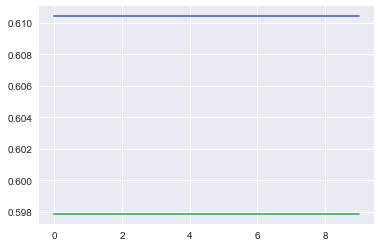

In [513]:
plt.plot(scores5);

In [514]:
coef_df5 = pd.DataFrame(lr5.coef_, index=PolynomialFeatures().fit(X_oscars).get_feature_names(X_oscars.columns), columns=['Coefs'])
coef_df5[coef_df5['Coefs'] != 0].sort_values('Coefs', ascending=False)

,Coefs
imdb_rating^2,2.520733e-02
actor_cum_oscars writer_cum_oscars,1.514548e-02
imdb_rating writer_cum_oscar_noms,1.340465e-02
actor_cum_oscars director_cum_oscars,1.335879e-02
imdb_rating director_cum_oscar_noms,1.266056e-02
imdb_rating writer_cum_oscars,1.120581e-02
imdb_rating producer_cum_oscars,9.216944e-03
imdb_rating director_cum_oscars,8.621639e-03
imdb_rating actor_cum_oscars,2.560240e-03
director_cum_oscar_noms writer_cum_oscars,2.555728e-03


In [515]:
X_valid = df_oscars_valid[['opening_release', 'opening_we_gross',\
                       'dom_gross', 'imdb_rating', \
                       'actor_cum_oscar_noms', 'actor_cum_oscars', \
                       'director_cum_oscar_noms', 'director_cum_oscars',\
                       'producer_cum_oscar_noms', 'producer_cum_oscars', \
                       'writer_cum_oscar_noms', 'writer_cum_oscars']]

X_valid_pol = PolynomialFeatures().fit_transform(X_valid)


df_valid_titles['predictions'] = lr5.predict(X_valid_pol)

/Users/maliksalam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [516]:
display_validation = df_valid_titles.sort_values(by='predictions', ascending = False).drop_duplicates('title')

In [517]:
display_validation[display_validation['predictions']>1]

,title,oscar_noms,predictions
4750,Dunkirk,8.0,4.924234
16161,Star Wars: The Last Jedi,4.0,4.718421
14055,The Shape of Water,13.0,3.976576
4872,Darkest Hour,6.0,3.586589
4509,Detroit,0.0,3.254575
13254,Phantom Thread,6.0,3.190018
3615,Coco,2.0,2.487708
15315,"Three Billboards Outside Ebbing, Missouri",7.0,2.416428
505,Baby Driver,3.0,2.122508
864,Battle of the Sexes,0.0,1.930971


In [511]:
np.transpose(df_master[df_master['title'] == 'The Shape of Water'])

,14055
actors,"[Sally Hawkins, Michael Shannon, Richard Jenki..."
directors,[Guillermo del Toro]
dom_gross,3.0209e+07
genre,Fantasy Drama
mpaa_rating,R
opening_release,2
opening_we_gross,166564
producers,"[Guillermo del Toro, J. Miles Dale]"
release_date,2017-12-01 00:00:00
runtime,119
